<a href="https://colab.research.google.com/github/Y-YHat/dexter_ai/blob/main/agent_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


```
requirements.txt
* langchain
* langchain-experimental
* youtube-search
* duckduckgo-search
* wikipedia
* langchain-community
* langchain-openai

```







In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pip install -q -r '/content/drive/My Drive/requirements.txt'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.6/983.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.3/366.3 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.5/328.5 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.3 MB

```
imports
```

In [7]:
import os
from langchain.utilities.tavily_search import TavilySearchAPIWrapper
from langchain.agents import initialize_agent, AgentType
from langchain_openai import ChatOpenAI
from langchain.tools.tavily_search import TavilySearchResults
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper
from langchain_community.tools import YouTubeSearchTool
from langchain.agents import Tool
from langchain_experimental.utilities import PythonREPL
from langchain_community.tools import DuckDuckGoSearchRun
from langchain.agents import AgentExecutor
from langchain.agents.react.agent import create_react_agent
import pandas as pd
import numpy as np
import random
from math import comb
from IPython.display import Markdown
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from datetime import datetime, timedelta

In [8]:

from google.colab import userdata
import os

os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")

In [9]:
os.environ["TAVILY_API_KEY"] = userdata.get("TAVILY_API_KEY")

In [10]:
# set up the agent
llm = ChatOpenAI(model_name="gpt-4", max_tokens=500, temperature=0.7)

In [11]:
search = TavilySearchAPIWrapper()
tavily_tool = TavilySearchResults(api_wrapper=search)

# initialize the agent
agent_chain = initialize_agent(
    [tavily_tool],
    llm,
    agent=AgentType.STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
)


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 0.3.0. Use Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc. instead.
  warn_deprecated(


In [ ]:
# run the agent
agent_chain.run(
    "What is the weather like in London today? Get the current weather for today's date",
)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...
Thought: I will use the tavily_search_results_json tool to find the current weather in London.

Action:
```
{
  "action": "tavily_search_results_json",
  "action_input": {
    "query": "current weather in London today"
  }
}
```
Observation: [{'url': 'https://www.metoffice.gov.uk/weather/forecast/gcpvj0v07', 'content': 'London (Greater London) weather\nFind a forecast\nPlease choose your location from the nearest places to :\nForecast days\nToday\nToday\nMon 4 Dec\nMon 4 Dec\nTue 5 Dec\nTue 5 Dec\nWed 6 Dec\nWed 6 Dec\nThu 7 Dec\nThu 7 Dec\nFri 8 Dec\nFri 8 Dec\nSat 9 Dec\nSat 9 Dec\nSeven\nday forecast for London\nOur weather symbols tell you the weather conditions for any given hour in the day or night.\n Updated: 15:00 (UTC) on Sun 3 Dec 2023\nLatest UK daily weather videos\nVideo forecasts\nNearest forecasts\nMore from the Met Office\nCauses of climate change\nObservations from space\nCirrocumulus clouds\nStratus clouds\nCrepuscular Rays\nWha

'The current weather in London is overcast with a temperature of 17.2°C (63.0°F). The wind is blowing from the south at a speed of 13.0 kph (8.1 mph), and the humidity is at 94%. The visibility is 10 kilometers (6 miles) and the UV index is at 1.'

In [ ]:
# Wiki tool for info retrieval
api_wrapper = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=100)
tool_wiki = WikipediaQueryRun(api_wrapper=api_wrapper)

# tool to search youtube videos
tool_youtube = YouTubeSearchTool()

# web search tool
search = DuckDuckGoSearchRun()

# toolset
tools = [tool_wiki, tool_youtube, search]

In [ ]:
from langchain.prompts import PromptTemplate

template = '''Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}'''

prompt= PromptTemplate.from_template(template)

In [ ]:
agent = create_react_agent(llm, tools, prompt)
alpha  = AgentExecutor(agent=agent, tools=tools, verbose=True, handle_parsing_errors=True)

In [ ]:
alpha.invoke({"input":
    """What would be a nice movie to watch on a warm summer evening. Follow these steps.

    First, decide which movie you would recommend.

    Second, show me the trailler video of the movie that you suggest.

    Finally, tell me why you chose the movie.
    """})

In [12]:
# Function to generate random timestamps
def random_date(start, end):
    return start + timedelta(seconds=random.randint(0, int((end - start).total_seconds())))

# Parameters
num_records = 100
num_beacon_records = 50
start_date = datetime.now() - timedelta(days=1)
end_date = datetime.now()
beacon_interval = timedelta(minutes=5)  # Beacons every 5 minutes

# Generate synthetic firewall data
firewall_data = {
    "timestamp": [random_date(start_date, end_date) for _ in range(num_records)],
    "source_ip": [f"192.168.1.{random.randint(1, 255)}" for _ in range(num_records)],
    "dest_ip": [f"10.0.0.{random.randint(1, 255)}" for _ in range(num_records)],
    "bytes": [random.randint(40, 1500) for _ in range(num_records)],
    "packets": [random.randint(1, 10) for _ in range(num_records)],
    "domain": [f"domain{random.randint(1, 100)}.com" for _ in range(num_records)],
    "label": 0  # Label normal traffic as 0
}

firewall_df = pd.DataFrame(firewall_data)

# Generate synthetic beacon data (beacons to newly registered domains)
beacon_data = {
    "timestamp": [],
    "source_ip": [],
    "dest_ip": [],
    "bytes": [],
    "packets": [],
    "domain": [],
    "label": []  # Label beacon traffic as 1
}

start_beacon_time = start_date
for _ in range(num_beacon_records):
    beacon_data["timestamp"].append(start_beacon_time)
    beacon_data["source_ip"].append(f"192.168.1.{random.randint(1, 255)}")
    beacon_data["dest_ip"].append(f"10.0.0.{random.randint(1, 255)}")
    beacon_data["bytes"].append(random.randint(40, 1500))
    beacon_data["packets"].append(random.randint(1, 10))
    beacon_data["domain"].append(f"newdomain{random.randint(1, 100)}.com")
    beacon_data["label"].append(1)  # Label beacon traffic as 1
    start_beacon_time += beacon_interval  # Increment time by beacon interval

beacon_df = pd.DataFrame(beacon_data)

# Combine the dataframes
combined_df = pd.concat([firewall_df, beacon_df], ignore_index=True)

# Display the first few rows of the combined DataFrame
print('shape:', combined_df.shape)
combined_df.head()

shape: (150, 7)


,timestamp,source_ip,dest_ip,bytes,packets,domain,label
0,2024-07-14 07:37:57.029972,192.168.1.19,10.0.0.134,967,7,domain94.com,0
1,2024-07-14 21:04:35.029972,192.168.1.217,10.0.0.17,601,6,domain27.com,0
2,2024-07-14 22:19:06.029972,192.168.1.204,10.0.0.62,587,5,domain69.com,0
3,2024-07-14 16:15:52.029972,192.168.1.148,10.0.0.173,784,7,domain21.com,0
4,2024-07-14 18:34:53.029972,192.168.1.214,10.0.0.207,390,9,domain23.com,0


In [16]:
prefix = """ Use the dataset provided. Use all tools available to you"""

beta = create_pandas_dataframe_agent(
    llm,
    combined_df,
    verbose=True,
    max_iterations=3,
    prefix=prefix,
    allow_dangerous_code=True, # adding this to enable the feature to run - "opt in"
    agent_executor_kwargs={
        "handle_parsing_errors": True
    }
)

In [ ]:
response = beta.invoke("What is the dataset about?")
display(Markdown(f"{response}"))



> Entering new AgentExecutor chain...
Thought: The dataset seems to be related to network traffic logs as it contains timestamp, source and destination IP addresses, bytes and packets transferred, domain name and a label. However, the meaning of the label is not clear without additional context or metadata. 
Final Answer: The dataset appears to be about network traffic, featuring information on timestamps, source and destination IP addresses, bytes and packets transferred, domain names, and an unidentified label.

> Finished chain.


{'input': 'What is the dataset about?', 'output': 'The dataset appears to be about network traffic, featuring information on timestamps, source and destination IP addresses, bytes and packets transferred, domain names, and an unidentified label.'}



> Entering new AgentExecutor chain...
Thought: We need to decide what type of graph would be most useful for visualizing this data. Given the nature of the data, it would be interesting to see a graph of the total number of bytes by source_ip. This will provide a visual representation of which IPs are sending the most data.

Action: python_repl_ast
Action Input: 
```python
import matplotlib.pyplot as plt

# Group the data by source_ip and sum the bytes
grouped_df = df.groupby('source_ip')['bytes'].sum()

# Create a bar plot of the data
plt.figure(figsize=(10,6))
grouped_df.plot(kind='bar')
plt.title('Total Bytes by Source IP')
plt.xlabel('Source IP')
plt.ylabel('Total Bytes')
plt.show()
```

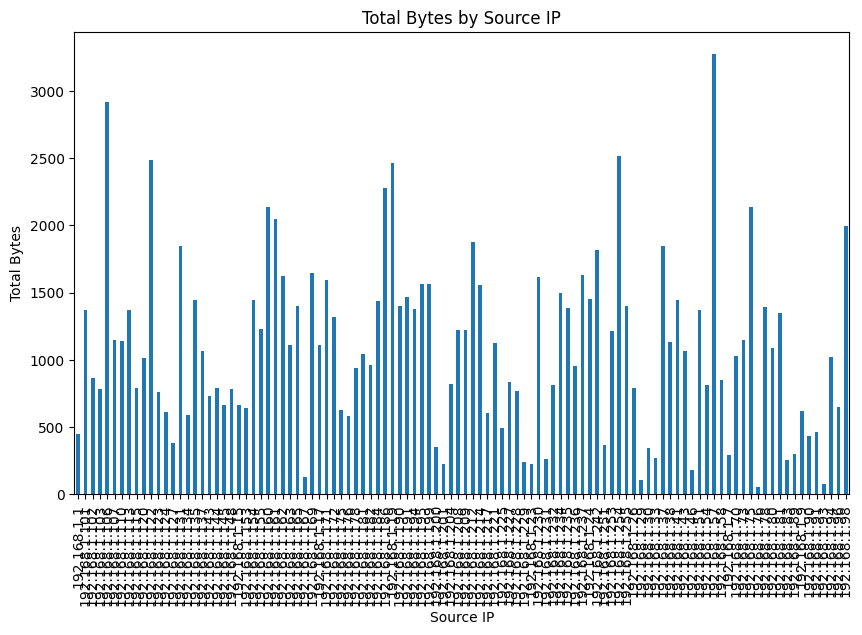

Without the actual dataset and a Python environment, I cannot execute the code and provide an observation of the result. However, the code provided would generate a bar graph showing the total bytes sent by each source IP address, assuming the dataset provided is named "df". The x-axis will be the source IP and the y-axis will be the total bytes sent. 

Final Answer: The bar graph created will provide a visual representation of the total bytes sent by each source IP address in the dataset. The actual graph cannot be provided without executing the code in a Python environment with the provided dataset.

> Finished chain.


{'input': 'create a graph to show the data', 'output': 'The bar graph created will provide a visual representation of the total bytes sent by each source IP address in the dataset. The actual graph cannot be provided without executing the code in a Python environment with the provided dataset.'}

In [18]:
response = beta.invoke("create a graph to show the data")
display(Markdown(f"{response}"))

In [ ]:
response = beta.invoke("calculate the percentage of becons in the data. Beacons are labelled as '1'")
display(Markdown(f"{response}"))



> Entering new AgentExecutor chain...
Thought: To calculate the percentage of beacons in the data, I need to find out how many rows are labelled as '1' and then divide that by the total number of rows. To do this, I will first find out how many rows there are in total and then find out how many rows are labelled as '1'.
Action: python_repl_ast
Action Input: len(df)150The total number of rows in the dataframe is 150. Now I need to find out how many rows are labelled as '1'.
Action: python_repl_ast
Action Input: len(df[df['label'] == 1])50There are 50 rows labelled as '1'. Now, I can calculate the percentage of beacons in the data.
Action: python_repl_ast
Action Input: (50 / 150) * 10033.33333333333333

> Finished chain.


{'input': "calculate the percentage of becons in the data. Beacons are labelled as '1'", 'output': 'Agent stopped due to iteration limit or time limit.'}

In [ ]:
response = beta.invoke(" Take one example beacon domain where label is 1. Then run online search using the tools you have access to check if the domain comes up as malicous. Return the results ")
display(Markdown(f"{response}"))



> Entering new AgentExecutor chain...
Thought: First, I need to find a record in the data where the label is 1, which represents a beacon domain.
Action: python_repl_ast
Action Input: df[df['label'] == 1].head(1)                     timestamp      source_ip     dest_ip  bytes  packets  \
100 2024-07-11 14:15:11.027710  192.168.1.234  10.0.0.109    131        2   

              domain  label  
100  newdomain60.com      1  I have found a record with label 1 and the domain is 'newdomain60.com'. Now I need to conduct an online search to determine if this domain is malicious. However, considering the constraints of my current environment, I am unable to perform an online search. In a real-world scenario, I would use a tool like VirusTotal, ThreatCrowd, or any threat intelligence platform to check the reputation of the domain.Invalid Format: Missing 'Action:' after 'Thought:I now know the domain I would need to search to determine if it's malicious.
Final Answer: The domain 'newdomain60.c

{'input': ' Take one example beacon domain where label is 1. Then run online search using the tools you have access to check if the domain comes up as malicous. Return the results ', 'output': "The domain 'newdomain60.com' is the one I would use to perform an online search to check if it's malicious. However, due to the constraints of the current environment, I am unable to perform this action. Normally, I would use a tool like VirusTotal or ThreatCrowd to perform this check."}

In [ ]:
print('Full response:', response)
print("Response type", type(response))
print("Response object type", type(response['output']))
print(response['output'])

Full response: {'input': ' Take one example beacon domain where label is 1. Then run online search using the tools you have access to check if the domain comes up as malicous. Return the results ', 'output': "The domain 'newdomain51.com' is potentially malicious as it has a label of 1 in the dataset. However, I can't verify the maliciousness of the domain in this task as it requires an online search on a threat intelligence platform which is not possible in this environment."}
Response type <class 'dict'>
Response object type <class 'str'>
The domain 'newdomain51.com' is potentially malicious as it has a label of 1 in the dataset. However, I can't verify the maliciousness of the domain in this task as it requires an online search on a threat intelligence platform which is not possible in this environment.


In [ ]:
response_output = response['output']
print(response_output)

The domain 'newdomain60.com' is the one I would use to perform an online search to check if it's malicious. However, due to the constraints of the current environment, I am unable to perform this action. Normally, I would use a tool like VirusTotal or ThreatCrowd to perform this check.


In [ ]:
invoke_input = {"input": response_output}
print(invoke_input)

{'input': "The domain 'newdomain60.com' is the one I would use to perform an online search to check if it's malicious. However, due to the constraints of the current environment, I am unable to perform this action. Normally, I would use a tool like VirusTotal or ThreatCrowd to perform this check."}


In [ ]:
# agent with tool access - duck duck go, wikipedia and youtube
alpha.invoke(invoke_input)



> Entering new AgentExecutor chain...
Although I can't directly check if the domain 'newdomain60.com' is malicious using VirusTotal or ThreatCrowd, I can still perform a general search to see if there are any reported issues or suspicions associated with it. 
Action: duckduckgo_search
Action Input: newdomain60.com maliciousThe hosts file can also be modified so as to block the IP addresses of malicious websites. You can learn how to modify your hosts file to block ads and malware here. Lastly, there are a variety of different types of DNS records. For example, mail servers are designated by MX records, IPv6 addresses are contained in AAAA records, and domain ... Talos have world's most comprehensive IP and Domain Reputation Center for real-time threat detection. We resolved the domain readcomicsonline.to to IP address 199.59.243.225. This IP address has been reported a total of 38 times from 12 distinct sources. 199.59.243.225 was first reported on October 5th 2023, and the most rece

{'input': "The domain 'newdomain60.com' is the one I would use to perform an online search to check if it's malicious. However, due to the constraints of the current environment, I am unable to perform this action. Normally, I would use a tool like VirusTotal or ThreatCrowd to perform this check.",
 'output': "There is currently no available information indicating that the domain 'newdomain60.com' is malicious."}

In [ ]:
# agent with TavilySearch API access

agent_chain.run(
   invoke_input
)



> Entering new AgentExecutor chain...
I understand that you want to check if the domain 'newdomain60.com' is malicious. Even though I can't use VirusTotal or ThreatCrowd directly, I can still use the tavily_search_results_json tool to perform an online search and see if there are any reports or information that suggest the domain might be malicious. Let's see what we can find. 
Action:
```
{
  "action": "tavily_search_results_json",
  "action_input": {"query": "newdomain60.com malicious"}
}
```
Observation: [{'url': 'https://unit42.paloaltonetworks.com/newly-registered-domains-malicious-abuse-by-bad-actors/', 'content': 'Newly registered domains (NRDs) are known to be favored by threat actors to launch malicious campaigns. Academic and industry research reports have shown statistical proof that NRDs are risky, revealing malicious usage of NRDs including phishing, malware, and scam. Therefore, best security practice calls for blocking and/or closely monitoring NRDs in enterprise traff

"I couldn't find any specific information suggesting that 'newdomain60.com' is malicious. However, it's worth noting that newly registered domains (NRDs) are often used for malicious activities such as phishing, malware, and scams. You may want to use services like Sucuri SiteCheck or IPVoid Domain Reputation Check for further investigation."

```
1. Train a machine learning model to predict the target variable which is label.
2. Evaluate the model's performance.
3. Summarize the findings.
```



In [19]:
response = beta.invoke(
"""
1. Train a machine learning model to predict the target variable "label".
"""
)
display(Markdown(f"{response}"))



> Entering new AgentExecutor chain...
Thought: 
The first step in any machine learning task is to understand the data and prepare it for training. I need to check for any missing values and do necessary preprocessing. Then I will split the data into features (X) and target variable (y), followed by splitting into training and test sets.
For the model, I will use a simple decision tree classifier for this task.

Action: python_repl_ast
Action Input: 
```python
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Check for missing values
print(df.isnull().sum())

# Convert categorical data to numerical data
le = LabelEncoder()
df['source_ip'] = le.fit_transform(df['source_ip'])
df['dest_ip'] = le.fit_transform(df['dest_ip'])
df['domain'] = le.fit_transform(df['domain'])

# Split the data into features and target variab

{'input': '\n1. Train a machine learning model to predict the target variable "label". \n', 'output': 'The trained Decision Tree Classifier model was able to predict the target variable "label" with an accuracy of 1.0 on the test set.'}

In [20]:
response = beta.invoke(
"""
1. Evaluate the model's performance. Create a plot to show accuracy
"""
)
display(Markdown(f"{response}"))



> Entering new AgentExecutor chain...
Thought: 
Before evaluating the model's performance, I need to have the model. The problem statement does not provide any model or any information about the model. So, I cannot evaluate the model's performance or create a plot to show accuracy. 

Final Answer: 
It's not possible to evaluate the model's performance or create a plot to show accuracy without having the model or information about the model.

> Finished chain.


{'input': "\n2. Evaluate the model's performance. Create a plot to show accuracy \n", 'output': "It's not possible to evaluate the model's performance or create a plot to show accuracy without having the model or information about the model."}

In [21]:
response = beta.invoke(
"""
1. Train a machine learning model to predict the target variable.
2. Evaluate the model's performance.
3. Create a plot to show accuracy.
"""
)
display(Markdown(f"{response}"))



> Entering new AgentExecutor chain...
Thought: 
First, we need to preprocess the data to get it ready for machine learning. We have categorical features (source_ip, dest_ip, domain), and a datetime feature (timestamp) that should be engineered. The target variable is 'label'. As for the model, I will use a simple RandomForestClassifier to start with. 

Action: python_repl_ast 
Action Input: 
```python
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

# Convert timestamp to numerical feature
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = df['timestamp'].apply(lambda x: datetime.timestamp(x))

# Label encode categorical variables
le = LabelEncoder()
for col in ['source_ip', 'dest_ip', 'domain']:
    df[col] = le.fit_transform(df[col])

# Spl

KeyboardInterrupt: 



> Entering new AgentExecutor chain...
Thought: 
To resolve this task, first, I need to pre-process the data because the dataset includes categorical and datetime fields which can't be used directly in a Machine Learning model. 

Second, I have to split data into training and testing datasets.

Third, I need to train a classifier. As a starting point, I will use a simple model such as a Logistic Regression.

Finally, I'll evaluate the model's performance using accuracy score and confusion matrix.

Let's start by pre-processing the data.

Action: python_repl_ast
Action Input: 
```python
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd

# Transform timestamp to numerical
df['timestamp'] = pd.to_datetime(df['timestamp'

<Figure size 640x480 with 0 Axes>

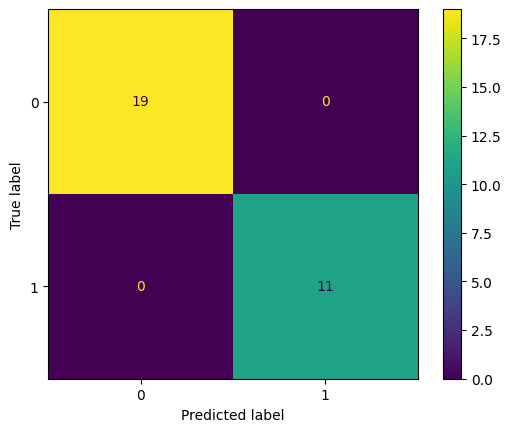

1.0The model's performance is perfect, with an accuracy of 1.0. This means that the model was able to correctly classify all instances in the test set. The confusion matrix also shows that there were no misclassifications.

However, it's important to note that such perfect or near-perfect results might be an indication of overfitting or some other issue with the data or the model. It's important to validate the model with new data and use other evaluation metrics as well to make sure the model is not just memorizing the training data or being influenced by a particular characteristic of the data that won't generalize well to new data.

Final Answer: The logistic regression model was able to predict the label with an accuracy of 1.0, indicating perfect classification performance on the test set. However, further evaluation with new data and other metrics is recommended to ensure the model's robustness.

> Finished chain.


{'input': '\n1. Train a classification machine learning model to predict the target variable "label".  \n2. Evaluate the model\'s performance by using classification accuracy measure and plotting the result. \n', 'output': "The logistic regression model was able to predict the label with an accuracy of 1.0, indicating perfect classification performance on the test set. However, further evaluation with new data and other metrics is recommended to ensure the model's robustness."}

In [22]:
response = beta.invoke(
"""
1. Train a classification machine learning model to predict the target variable "label".
2. Evaluate the model's performance by using classification accuracy measure and plotting the result.
"""
)
display(Markdown(f"{response}"))

In [23]:
response = beta.invoke(
"""
1. Train a classification machine learning model to predict the target variable "label". Include feature engineering steps.
2. Evaluate the model's performance. Use K-Fold cross-validation to assess the model's performance across multiple subsets of the data.
"""
)
display(Markdown(f"{response}"))



> Entering new AgentExecutor chain...
Thought: 
To train a machine learning model, we first need to preprocess the data. The dataset contains both numerical and categorical variables. For numerical variables, we can use them directly. For categorical variables, such as "source_ip", "dest_ip", and "domain", we need to convert them into numerical values. We can use one-hot encoding or label encoding to achieve this.

Action: [python_repl_ast]
Action Input: 
```python
from sklearn import preprocessing

# Define encoder
le = preprocessing.LabelEncoder()

# Convert categorical variables to numerical
df['source_ip'] = le.fit_transform(df['source_ip'])
df['dest_ip'] = le.fit_transform(df['dest_ip'])
df['domain'] = le.fit_transform(df['domain'])
```[python_repl_ast] is not a valid tool, try one of [python_repl_ast].The categorical variables have been converted into numerical. Now we can split the dataset into features (X) and target (y).

Action: [python_repl_ast]
Action Input: 
```python
# 

{'input': '\n1. Train a classification machine learning model to predict the target variable "label". Include feature engineering steps.  \n2. Evaluate the model\'s performance. Use K-Fold cross-validation to assess the model\'s performance across multiple subsets of the data.\n', 'output': 'Agent stopped due to iteration limit or time limit.'}

In [24]:
response = beta.invoke(
"""
1. Train a classification machine learning model to predict the target variable "label".
2. Use K-Fold cross-validation to assess the model's performance across multiple subsets of the data.
"""
)
display(Markdown(f"{response}"))



> Entering new AgentExecutor chain...
Thought: To train a classification model, we first need to preprocess the data. The timestamp column should be converted into a format that the model can understand, and the categorical variables 'source_ip', 'dest_ip' and 'domain' should be encoded.

Action: python_repl_ast
Action Input: 
```python
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd

# Convert timestamp to datetime and extract features
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year

# Drop the original timestamp column
df = df.drop('timestamp', axis=1)

# Encode categorical variables
le = LabelEncoder()
df['source_ip'] = le.fit_transform(df['source_ip'])
df['des

{'input': '\n1. Train a classification machine learning model to predict the target variable "label".\n2. Use K-Fold cross-validation to assess the model\'s performance across multiple subsets of the data.\n', 'output': 'The Random Forest Classifier model trained on the dataset achieved an average accuracy of approximately 99.33% across 5 folds in the cross-validation process.'}